# 1. Importing the Libraries and Dataset



In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import time
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import pydotplus
import pydot
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot


keras.backend.clear_session()
%matplotlib inline

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



Using TensorFlow backend.


# 2. Visualizing the dataset

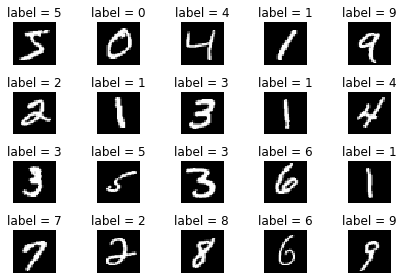

In [2]:
for i in range(20):
    image = X_train[i].reshape(28, 28)
    plt.subplot(4, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(Y_train[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Reshaping the datasets

In [3]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')/255
X_test = X_test.reshape(10000,28,28,1).astype('float32')/255
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


# 4. Model Function

In [4]:
mnist = Sequential()
mnist.add(Conv2D(15, kernel_size = (3,3), input_shape = (28,28,1), name = "Conv1"))
mnist.add(Conv2D(30, kernel_size = (5,5), name = "Conv2"))
mnist.add(MaxPooling2D(pool_size=(2, 2), name = "MaxPool"))
mnist.add(Flatten(name = "Flatten"))
mnist.add(Dense(250, activation=tf.nn.relu, name = "Dense1"))
mnist.add(Dropout(0.25, name = "Dropout"))
mnist.add(Dense(10, activation = tf.nn.softmax, name = "Dense2"))

# 5. Model Structure

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 15)        150       
_________________________________________________________________
Conv2 (Conv2D)               (None, 22, 22, 30)        11280     
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 11, 11, 30)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 3630)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 250)               907750    
_________________________________________________________________
Dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 10)               

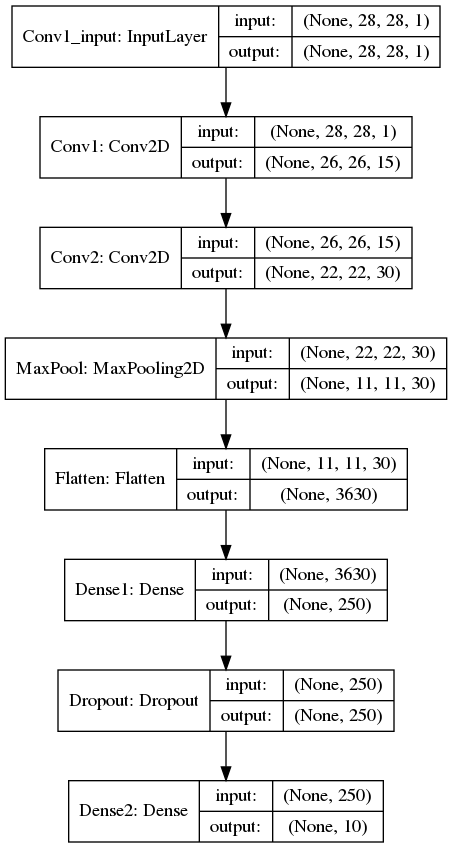

In [5]:
mnist.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
mnist.summary()
keras.utils.plot_model(mnist, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 6. Training the model

In [6]:
mnist.fit(x=X_train,y=Y_train, epochs=10)
mnist.evaluate(X_test, Y_test)

Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1535 - accuracy: 0.9532
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0614 - accuracy: 0.9811
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0454 - accuracy: 0.9859
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0351 - accuracy: 0.9886
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0301 - accuracy: 0.9905
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0260 - accuracy: 0.9914
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0248 - accuracy: 0.9920
Epoch 8/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0203 - accuracy: 0.9938
Epoch 9/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0200 - accuracy: 0.9937
Epoch 10/10
10000/10000 [==============================

[0.08276983905200827, 0.9851999878883362]

# 7. Model performance

(10000, 10)
Wrong Predictions


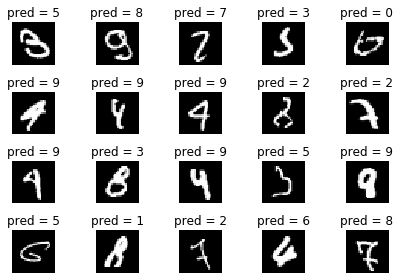

Correct Predictions


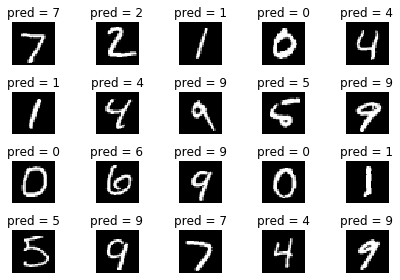

In [7]:
Y_predict = mnist.predict(X_test)
print(Y_predict.shape)
Y_pred = Y_predict.argmax(axis = 1)
i=0
p=0
for p in range(10000):
    if(Y_test[p] != Y_pred[p]):
        image = X_test[p].reshape(28, 28)
        plt.subplot(4, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title('pred = {0}'.format(Y_pred[p]))
        plt.axis('off')
        i+=1
    if(i == 20):
        break
plt.tight_layout()
print('Wrong Predictions')
plt.show()

i=0
p=0
for p in range(10000):
    if(Y_test[p] == Y_pred[p]):
        image = X_test[p].reshape(28, 28)
        plt.subplot(4, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title('pred = {0}'.format(Y_pred[p]))
        plt.axis('off')
        i+=1
    if(i == 20):
        break
plt.tight_layout()
print('Correct Predictions')
plt.show()

(-0.5, 27.5, 27.5, -0.5)

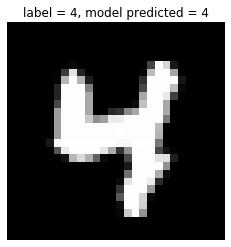

In [8]:
i=85
image = X_test[i].reshape(28,28)
plt.imshow(image, cmap='gray')
plt.title('label = {0}, model predicted = {1}'.format(Y_test[i],Y_pred[i]))
plt.axis('off')

# 8. Input your own image (.png file with white background and black number)

2


(-0.5, 27.5, 27.5, -0.5)

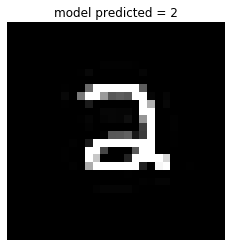

In [9]:
from PIL import Image, ImageFilter
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))

    if width > height:
        nheight = int(round((20.0 / width * height), 0))
        if (nheight == 0):
            nheight = 1
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20.0 / height * width), 0))
        if (nwidth == 0):
            nwidth = 1
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))
        newImage.paste(img, (wleft, 4))

    tv = list(newImage.getdata())

    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

x=imageprepare('test1.png') #file path here (png)
x = np.array(x).reshape(1,28,28,1)
Y_pred = mnist.predict(x).argmax()
plt.imshow(x.reshape(28,28), cmap='gray')
print(Y_pred)
plt.title('model predicted = {0}'.format(Y_pred))
plt.axis('off')